# Introduction

In this project I will investigate if there is a correlation between economic output in certain countries and life expectancy of its citizens.

Main goals are to prepare data and analysis with plots and explain my study.

Main questions to answer during analysis:

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Loading the data

First I am importing libraries that will be used in this project such as:
- pandas
- seaborn
- numpy
- matplotlib

Then I am loading data and saving it to variable `data`

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv('all_data.csv')

In [2]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Renaming column `Life expectancy at birth (years)` to `Life_expectancy`

In [3]:
data = data.rename(columns={
    "Life expectancy at birth (years)": "Life_expectancy"
})
data.head()

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
data.shape

(96, 4)

## Explore data

Checking for unique values in Country and Year column to check in what date range data was collected and for which countries.

Country - we have data collected for 6 countries:
- Chile
- China
- Germany
- Mexico
- USA
- Zimbabwe

Year - Data was collected for 2000 - 2015

In [5]:
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [6]:
data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

### Exploratory Plots

Below the distribution of `GDP` is being shown. As we can notice it is right skewed while most of its values are present on the left side.

Text(0.5, 6.368000000000002, 'GDP in Trillions USD')

<Figure size 576x432 with 0 Axes>

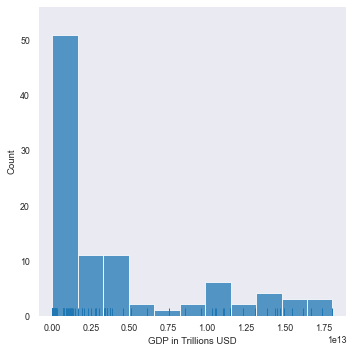

In [7]:
plt.figure(figsize=(8, 6))
sns.set_style('dark')
sns.set_context('paper')
sns.displot(data.GDP, rug=True, kde=False)
plt.xlabel("GDP in Trillions USD")

The distribution of `Life_expactancy` column is being shown below. As visible it is left skewed with most of its values on the right side which is the opposite of what we saw on previous model.

Text(0.5, 6.368000000000002, 'Life Expectancy at birth (years)')

<Figure size 576x432 with 0 Axes>

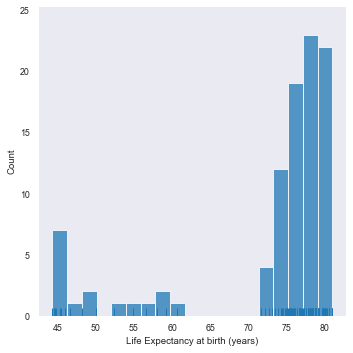

In [8]:
plt.figure(figsize=(8, 6))
sns.set_style('dark')
sns.set_context('paper')
sns.displot(data.Life_expectancy, rug=True, kde=False)
plt.xlabel("Life Expectancy at birth (years)")

Below we set our data so it contains mean values for `Life_expectancy` and `GDP` grouped by `Country`

In [9]:
dataMeans = data.drop('Year', axis=1).groupby('Country').mean().reset_index()
dataMeans

,Country,Life_expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


With mean values set I created the barplot of Life Expectancy for all of the countries.
As we can notice, every country has values above 70s except of the Zimbabwe which explaines the skew in previous distribution.

Text(0.5, 0, 'Life expectancy at birth (years)')

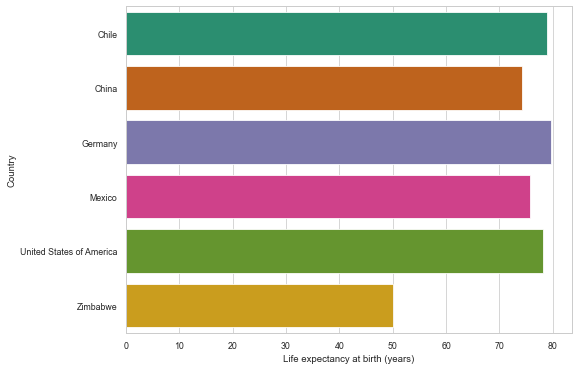

In [10]:
plt.figure(figsize=(8,6))
sns.set_palette('Dark2')
sns.set_style('whitegrid')
sns.barplot(x='Life_expectancy', y='Country', data=dataMeans)
plt.xlabel('Life expectancy at birth (years)')

Next barplot has been made for average `GDP` by `Country`.
Here we can notice that Zimbabwe is not visible and Chile is close to the same state.
The biggest GDP compared to others belongs to USA while China, Germany and Mexico are relatively close to eachother in figures

Text(0.5, 0, 'GDP in Trillions USD')

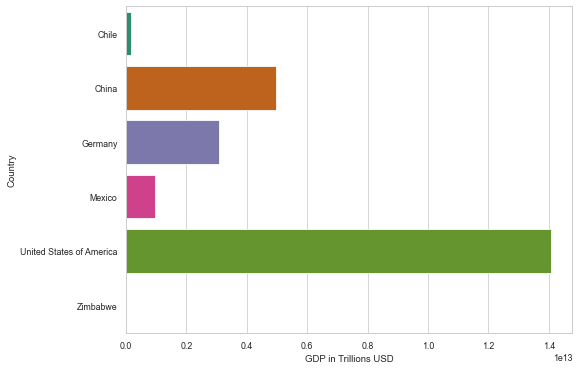

In [11]:
plt.figure(figsize=(8,6))
sns.set_palette("Dark2")
sns.set_style("whitegrid")
sns.set_context('paper')
sns.barplot(x="GDP", y="Country", data=dataMeans)
plt.xlabel("GDP in Trillions USD")

### Violin Plots

In the plot on the left which shows us `GDP` we can see that China and USA has relatively wide range, as for Zimbabwe, Chile and Mexico has shorter ones. 

In the `Life_expectancy` plot we can observe that Zimbabwe has a rang from the high 30s to high 60s (close to 70) while other countries has shorter range from 70s up. Again that explains why we have noticed skewed plot before.

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,5))
sns.set_palette('Dark2')
ax[0] = sns.violinplot(ax=ax[0], x=data.GDP, y=data.Country, color='black')
ax[0] = sns.swarmplot(ax=ax[0], x=data.GDP, y=data.Country)
ax[0].set_xlabel("GDP in Trillions USD")
ax[1] = sns.violinplot(ax=ax[1], x=data.Life_expectancy, y=data.Country, color='black')
ax[1] = sns.swarmplot(ax=ax[1], x=data.Life_expectancy, y=data.Country)
ax[1].set_xlabel("Life expectancy at birth (years)")

### Line Charts

Below we can see countries separated by colors and we can notice that USA and China have a noticable gains between 2000-2015 of `GDP`. China started at less than 1/4 Trillion USD up to 1 Trillion USD and USA from around 1 Trillion to over 1.75 Trillion USD. Other countries didn't have increases in this magnitude.

Text(0, 0.5, 'GDP in Trillions USD')

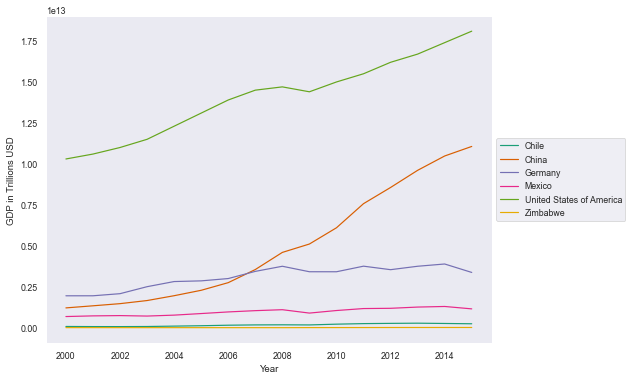

In [13]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
sns.set_palette('Dark2')
sns.lineplot(x=data.Year, y=data.GDP, hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions USD")

Below I did more in depth charts with faceted line charts for each `Country` as individual plots.

Here we can see that all countries experienced increases of `GDP` which was not visible above due to the nature of the plot where we compare all countries at once. Here we can check the growth more throughly.

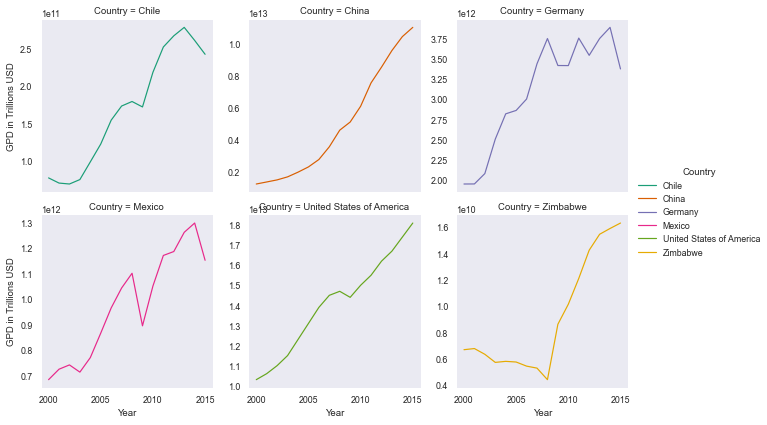

In [14]:
graphGDP = sns.FacetGrid(data, col='Country', col_wrap=3, hue='Country', sharey=False)
graphGDP = (graphGDP.map(sns.lineplot, 'Year', 'GDP')
            .add_legend()
            .set_axis_labels('Year', 'GPD in Trillions USD'))
graphGDP

Below I have made a similar chart but for `Life_expectancy`.

Here we notice that every country shows the increase in life expectancy, but for Zimbabwe it is the biggest after a dip around 2004.

Text(0, 0.5, 'Life expectancy at birth (years)')

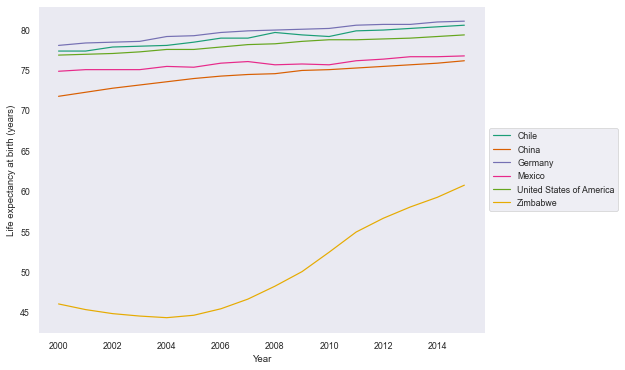

In [15]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data.Year, y=data.Life_expectancy, hue=data.Country)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)")

Just like for `GDP`, here I made separate faceted charts for each of the countries to explore the growth more deeply. 

Here we can notice that just like above, Zimbabwe got a dip around 2004 and afterwards there was a big increase of life expectancy.

We can also notice that Mexico and Chile had dips in their life expectancies around the same time (between 2005-2010), which can imply that there were simillar occurances during that time in those countries.

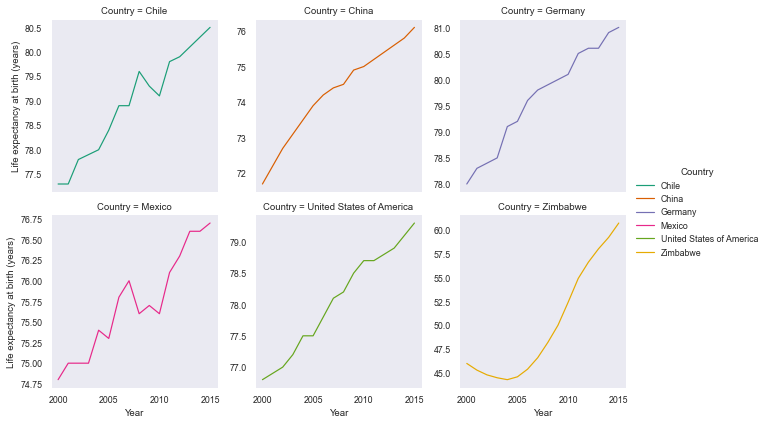

In [16]:
graphLifeExp = sns.FacetGrid(data, col='Country', col_wrap=3, hue='Country', sharey=False)
graphLifeExp = (graphLifeExp.map(sns.lineplot, 'Year', 'Life_expectancy')
               .add_legend()
               .set_axis_labels('Year', 'Life expectancy at birth (years)'))
graphLifeExp

### Scatter Plot

Next thing I wanted to check is the relationship between `GDP` and `Life_expectancy`.

For that I used scatter plot below. Here we noticed that Zimbabwe is flat while its life expectancy is going up.

Other countries seems to get increased values of life expectancy as GPD goes up. The USA and China shows very similar slopes in their relationship between those two values.

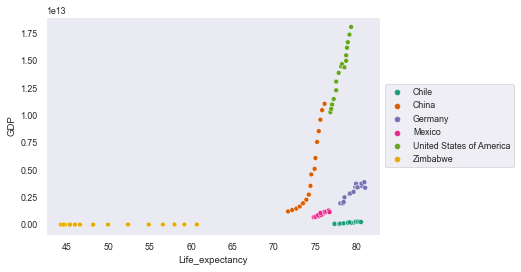

In [17]:
sns.scatterplot(
    x=data.Life_expectancy, 
    y=data.GDP, 
    hue=data.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

Just like before, I decided to check every country on its own without shared y and x values.

Here we noticed that there is a positive correlation between `GDP` and `Life_expectancy`. We notice that as most of the countries has somehwat linear charts or as it is in case of China, there is a slight curve on the chart.

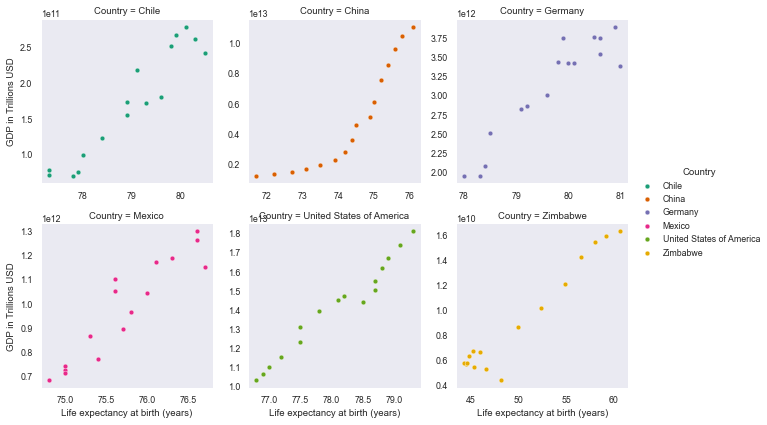

In [18]:
graph = sns.FacetGrid(data, col='Country', col_wrap=3, hue='Country', sharey=False, sharex=False)
graph = (graph.map(sns.scatterplot, 'Life_expectancy', 'GDP')
        .add_legend()
        .set_axis_labels('Life expectancy at birth (years)', 'GDP in Trillions USD'))
graph

## Conclusions

After performing data visualizations we are now able to answer questions asked before:
- Has life expectancy increased over time in the six nations?
    - Yes, with Zimbabwe having the greatest increase among other.
- Has GDP increased over time in the six nations?
    - Yes, with China having the biggest increase of GDP amont other countries.
- Is there a correlation between GDP and life expectancy of a country?
    - There is a positive correlation between GDP and Life Expectancy for all of the countries.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for all of the coutries with the exception of Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - Life expectancy had a left skew with the most of the observations on the right side.